In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('TUPP.csv')
df.head()

,station,time,latitude [degrees_north],longitude [degrees_east],elevation [feet],temp_2m [degF],relative_humidity [percent],dewpoint [degF],precip_incremental [inch],solar_insolation [W/m^2],snow_depth
0,TUPP,2016-07-12 00:00:00 EDT,44.22128,-74.43826,1650,NaN,NaN,NaN,NaN,NaN,NaN
1,TUPP,2016-07-12 00:05:00 EDT,44.22128,-74.43826,1650,NaN,NaN,NaN,NaN,NaN,NaN
2,TUPP,2016-07-12 00:10:00 EDT,44.22128,-74.43826,1650,NaN,NaN,NaN,NaN,NaN,NaN
3,TUPP,2016-07-12 00:15:00 EDT,44.22128,-74.43826,1650,NaN,NaN,NaN,NaN,NaN,NaN
4,TUPP,2016-07-12 00:20:00 EDT,44.22128,-74.43826,1650,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['time_formatted'] = pd.to_datetime(df['time'].str.replace('EDT', '').str.replace('EST', '').str.strip(), format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904620 entries, 0 to 904619
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   station                      904620 non-null  object        
 1   time                         904620 non-null  object        
 2   latitude [degrees_north]     904620 non-null  float64       
 3   longitude [degrees_east]     904620 non-null  float64       
 4   elevation [feet]             904620 non-null  int64         
 5   temp_2m [degF]               894716 non-null  float64       
 6   relative_humidity [percent]  890862 non-null  float64       
 7   dewpoint [degF]              888559 non-null  float64       
 8   precip_incremental [inch]    863996 non-null  float64       
 9   solar_insolation [W/m^2]     896872 non-null  float64       
 10  snow_depth                   410891 non-null  float64       
 11  time_formatted            

In [4]:
df = df.set_index('time_formatted')
df = df.tz_localize('US/Eastern', ambiguous='infer')

In [5]:
df[~pd.isna(df['snow_depth'])]

,station,time,latitude [degrees_north],longitude [degrees_east],elevation [feet],temp_2m [degF],relative_humidity [percent],dewpoint [degF],precip_incremental [inch],solar_insolation [W/m^2],snow_depth
time_formatted,,,,,,,,,,,
2017-10-04 20:00:00-04:00,TUPP,2017-10-04 20:00:00 EDT,44.22128,-74.43826,1650,65.4,85.4,60.8,0.000,0.0,0.1
2017-10-04 20:05:00-04:00,TUPP,2017-10-04 20:05:00 EDT,44.22128,-74.43826,1650,65.7,84.9,61.0,0.000,0.0,0.1
2017-10-04 20:10:00-04:00,TUPP,2017-10-04 20:10:00 EDT,44.22128,-74.43826,1650,66.1,85.1,61.4,0.000,0.0,0.1
2017-10-04 20:15:00-04:00,TUPP,2017-10-04 20:15:00 EDT,44.22128,-74.43826,1650,66.0,85.9,61.6,0.006,0.0,0.1
2017-10-04 20:20:00-04:00,TUPP,2017-10-04 20:20:00 EDT,44.22128,-74.43826,1650,65.5,88.5,62.0,0.052,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15 23:35:00-05:00,TUPP,2025-02-15 23:35:00 EST,44.22128,-74.43826,1650,17.1,91.6,15.1,0.000,0.0,28.6
2025-02-15 23:40:00-05:00,TUPP,2025-02-15 23:40:00 EST,44.22128,-74.43826,1650,17.1,91.5,15.1,0.000,0.0,28.6
2025-02-15 23:45:00-05:00,TUPP,2025-02-15 23:45:00 EST,44.22128,-74.43826,1650,17.1,91.5,15.0,0.000,0.0,28.6


In [6]:
df = df.loc['2017':].copy()

In [7]:
df.resample(rule='YE').max()

,station,time,latitude [degrees_north],longitude [degrees_east],elevation [feet],temp_2m [degF],relative_humidity [percent],dewpoint [degF],precip_incremental [inch],solar_insolation [W/m^2],snow_depth
time_formatted,,,,,,,,,,,
2017-12-31 00:00:00-05:00,TUPP,2017-12-31 23:55:00 EST,44.22128,-74.43826,1650,86.5,99.3,69.6,0.327,1125.0,14.6
2018-12-31 00:00:00-05:00,TUPP,2018-12-31 23:55:00 EST,44.22128,-74.43826,1650,91.4,100.0,74.0,0.398,1119.0,17.8
2019-12-31 00:00:00-05:00,TUPP,2019-12-31 23:55:00 EST,44.22128,-74.43826,1650,85.9,100.0,74.0,0.216,1129.0,27.1
2020-12-31 00:00:00-05:00,TUPP,2020-12-31 23:55:00 EST,44.22128,-74.43826,1650,90.1,100.0,72.5,0.279,1187.0,25.2
2021-12-31 00:00:00-05:00,TUPP,2021-12-31 23:55:00 EST,44.22128,-74.43826,1650,84.9,100.0,75.0,0.292,1184.0,25.2
2022-12-31 00:00:00-05:00,TUPP,2022-12-31 23:55:00 EST,44.22128,-74.43826,1650,86.7,100.0,73.4,0.343,1179.0,23.1
2023-12-31 00:00:00-05:00,TUPP,2023-12-31 23:55:00 EST,44.22128,-74.43826,1650,87.7,100.0,71.0,0.231,1178.0,26.3
2024-12-31 00:00:00-05:00,TUPP,2024-12-31 23:55:00 EST,44.22128,-74.43826,1650,88.7,100.0,74.1,0.311,1254.0,22.9
2025-12-31 00:00:00-05:00,TUPP,2025-02-15 23:55:00 EST,44.22128,-74.43826,1650,36.4,99.8,34.4,0.028,710.0,29.8


In [8]:
df['snow_depth_filled'] = df['snow_depth'].apply(lambda x: 0 if x<=0 or pd.isna(x) else x)

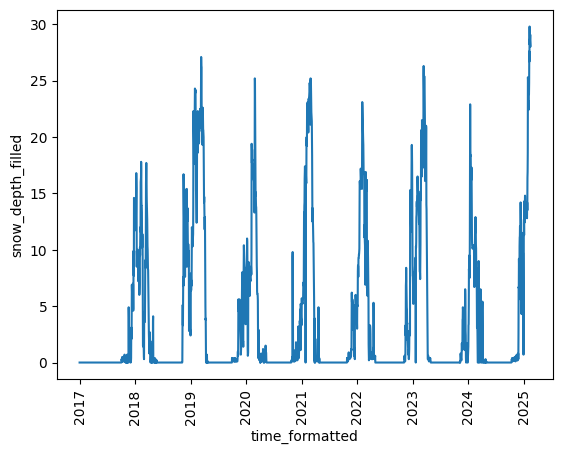

In [9]:
sns.lineplot(df[['snow_depth_filled']].resample(rule='D').max(), x='time_formatted', y='snow_depth_filled')
plt.xticks(rotation=90)
plt.show()

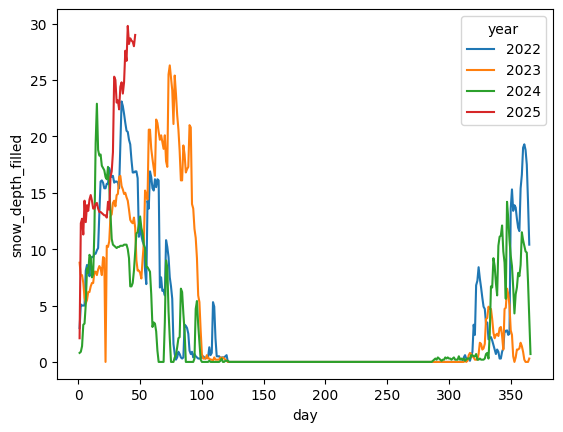

In [10]:
day_df = df.loc['2022':][['snow_depth_filled']].resample(rule='D').max()
day_df['day'] = day_df.index.dayofyear
day_df['year'] = day_df.index.year.astype(str)
sns.lineplot(day_df, x='day', y='snow_depth_filled', hue='year')
plt.show()

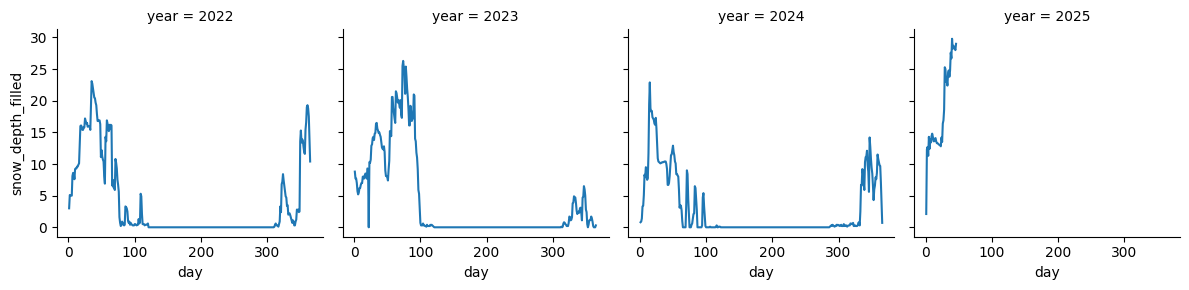

In [11]:
g = sns.FacetGrid(day_df, col="year", col_wrap=4)
g.map(sns.lineplot,'day', 'snow_depth_filled')
plt.show()

In [12]:
max_snow_before_middle_of_year = day_df[(day_df['day']<=180) & (day_df['snow_depth_filled']>0)].groupby('year', as_index=False).agg(max_day = ('day', 'max'))
max_snow_before_middle_of_year

,year,max_day
0,2022,120
1,2023,120
2,2024,121
3,2025,46


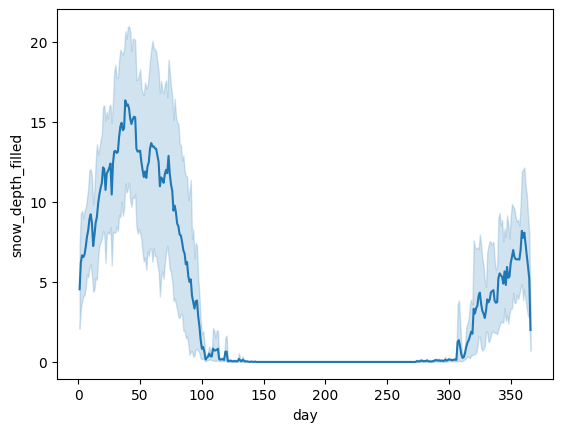

In [13]:
day_df = df[['snow_depth_filled']].resample(rule='D').max()
day_df['day'] = day_df.index.dayofyear
day_df['year'] = day_df.index.year.astype(str)
sns.lineplot(day_df, x='day', y='snow_depth_filled')
plt.show()

In [14]:
#! pip install statsforecast
#! pip install utilsforecast
from statsforecast.core import StatsForecast
from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from statsforecast.models import (
    Naive,
    SeasonalNaive,
    SimpleExponentialSmoothing,
    Holt,
    HoltWinters,
    AutoARIMA,
    ARIMA
)

In [15]:
monthly_snow_data = df[['snow_depth_filled']].resample(rule='ME').mean().reset_index()
monthly_snow_data['id'] = 0
monthly_snow_data.head()

,time_formatted,snow_depth_filled,id
0,2017-01-31 00:00:00-05:00,0.0,0
1,2017-02-28 00:00:00-05:00,0.0,0
2,2017-03-31 00:00:00-04:00,0.0,0
3,2017-04-30 00:00:00-04:00,0.0,0
4,2017-05-31 00:00:00-04:00,0.0,0


In [17]:
from statsforecast import StatsForecast
from statsforecast.models import ARIMA, AutoARIMA, HoltWinters

# Initialize StatsForecast with the models
sf = StatsForecast(
    models=[arima_model, auto_arima_model, holt_winters_model],
    freq='MS',  # Monthly frequency
    n_jobs=-1  # Using all available cores
)

# Fit the models
sf.fit(df=monthly_snow_data,
       id_col='id',
       time_col='time_formatted',
       target_col='snow_depth_filled')

# Forecast for the next 12 months
y_pred_all = sf.predict(h=12)  # Forecasting 12 months


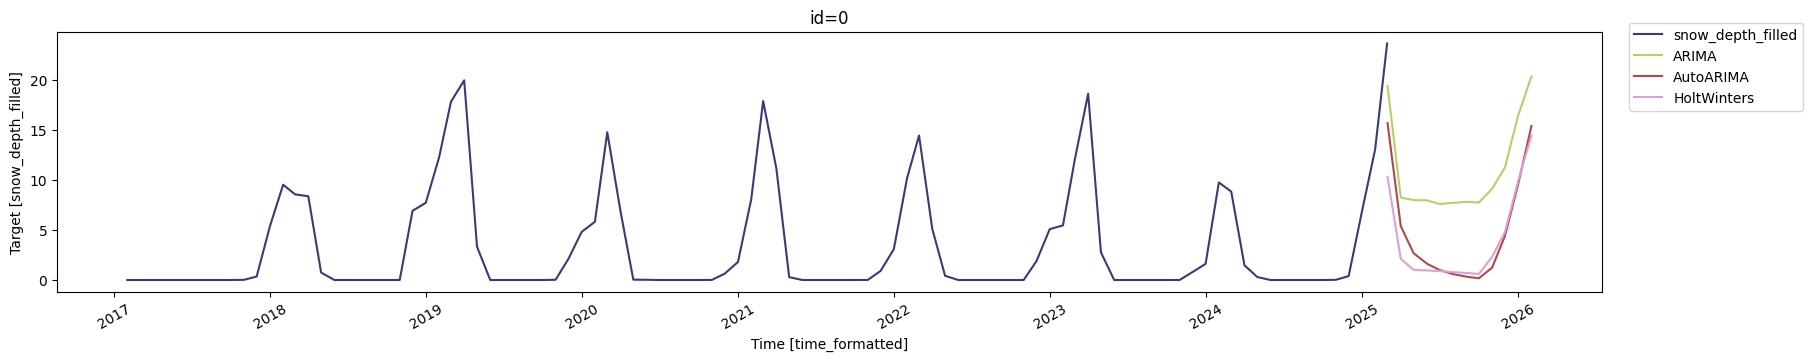

In [18]:
sf.plot(monthly_snow_data,
        y_pred_all,
        id_col='id',
        time_col='time_formatted',
        target_col='snow_depth_filled',
        )

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values (assuming the last 12 months in the monthly_snow_data)
y_test = monthly_snow_data['snow_depth_filled'][-12:].values

# Forecasted values from each model (assuming y_pred_all contains forecasts for all models)
y_arima_pred = y_pred_all['ARIMA'].values
y_auto_arima_pred = y_pred_all['AutoARIMA'].values
y_hw_pred = y_pred_all['HoltWinters'].values

# Calculate MAE, RMSE for each model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return mae, rmse, 

# Evaluating all models
arima_metrics = evaluate_model(y_test, y_arima_pred)
auto_arima_metrics = evaluate_model(y_test, y_auto_arima_pred)
hw_metrics = evaluate_model(y_test, y_hw_pred)

print(f"ARIMA - MAE: {arima_metrics[0]}, RMSE: {arima_metrics[1]}")
print(f"AutoARIMA - MAE: {auto_arima_metrics[0]}, RMSE: {auto_arima_metrics[1]}")
print(f"HoltWinters - MAE: {hw_metrics[0]}, RMSE: {hw_metrics[1]}")


ARIMA - MAE: 7.710991784365539, RMSE: 8.504493329355642
AutoARIMA - MAE: 3.3890063323686666, RMSE: 5.209239260688196
HoltWinters - MAE: 2.6576293127418893, RMSE: 3.9568189717105513


C:\Users\rahul\AppData\Local\Temp\ipykernel_17324\908684865.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_snow_data['time_formatted'].iloc[-1], periods=13, freq='M')[1:]


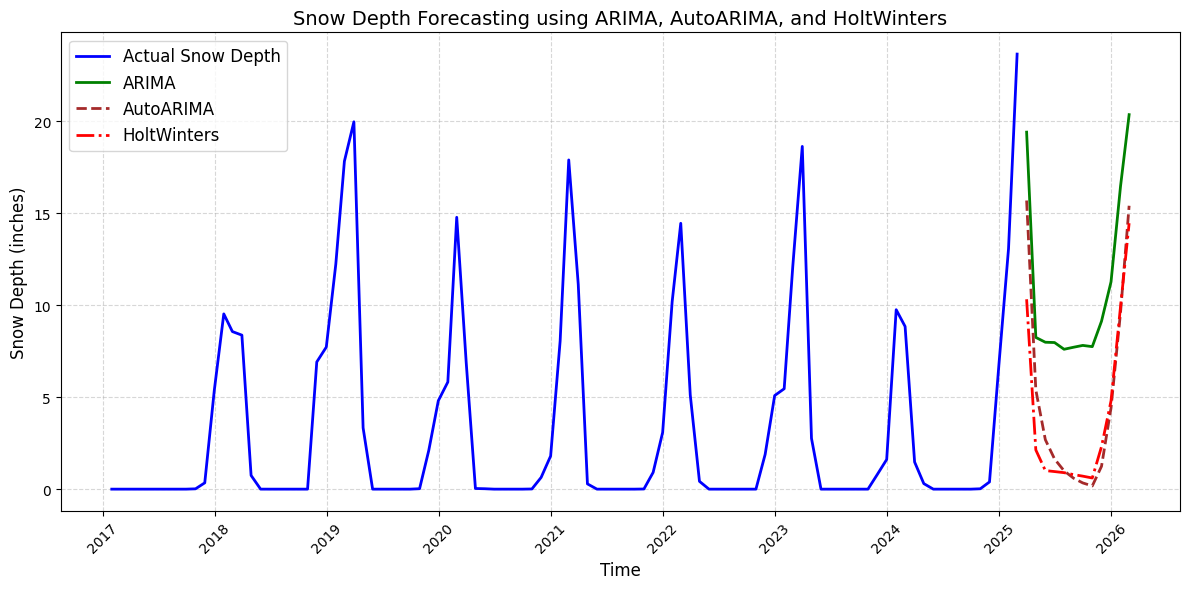

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting all models including the actual data
plt.figure(figsize=(12, 6))

# Plot actual snow depth (Original data)
plt.plot(monthly_snow_data['time_formatted'], monthly_snow_data['snow_depth_filled'], 
         label='Actual Snow Depth', color='blue', linewidth=2)

# Forecasting for the next 12 months
forecast_index = pd.date_range(start=monthly_snow_data['time_formatted'].iloc[-1], periods=13, freq='M')[1:]

# Plot forecasts from ARIMA, AutoARIMA, and HoltWinters
plt.plot(forecast_index, y_pred_all['ARIMA'], label='ARIMA', color='green', linestyle='-', linewidth=2)
plt.plot(forecast_index, y_pred_all['AutoARIMA'], label='AutoARIMA', color='Brown', linestyle='--', linewidth=2) 
plt.plot(forecast_index, y_pred_all['HoltWinters'], label='HoltWinters', color='red', linestyle='-.', linewidth=2)

# Customize the plot 
plt.legend(loc='upper left', fontsize=12)
plt.title('Snow Depth Forecasting using ARIMA, AutoARIMA, and HoltWinters', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Snow Depth (inches)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to display year labels only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
